## Data Wrangling and Analysis Project

### Importing needed Python Labriries

In [11]:
import numpy as np
import pandas as pd
import requests
import tweepy
import os
import json
import re
import seaborn as sns
import datetime
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'tweepy'

## Wrangling Data

### 1. Gathering

#### 1.1. Gather twitter-archive-enhanced

In [12]:
# Create CSV file into DataFrame
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [13]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### 1.2. Gather image-predictions

In [14]:
# Get the file name programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]
response = requests.get(url)

In [15]:
# Save HTML to file
with open (file_name, mode='wb') as file:
    file.write(response.content)

In [16]:
# Create TSV file into DataFrame
image_predictions_df = pd.read_csv(file_name, sep='\t')

In [17]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### 1.3. Gather twitter_api

In [18]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


NameError: name 'OAuthHandler' is not defined

In [19]:
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})

NameError: name 'json' is not defined

In [20]:
twitter_api_df = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

In [21]:
twitter_api_df

,tweet_id,retweet_count,favorite_count


### 2. Assessing

In [22]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [23]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [24]:
sum(archive_df.name.isnull())

0

In [25]:
archive_df[archive_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [26]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
sum(image_predictions_df.tweet_id.isnull())

0

In [29]:
image_predictions_df[image_predictions_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [30]:
twitter_api_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        0 non-null      object
 1   retweet_count   0 non-null      object
 2   favorite_count  0 non-null      object
dtypes: object(3)
memory usage: 0.0+ bytes


In [31]:
twitter_api_df.describe()

,tweet_id,retweet_count,favorite_count
count,0,0,0
unique,0,0,0
top,NaN,NaN,NaN
freq,NaN,NaN,NaN


In [32]:
twitter_api_df[twitter_api_df.tweet_id.duplicated()].sum()

tweet_id          0.0
retweet_count     0.0
favorite_count    0.0
dtype: float64

### Assessing output

### A. Quality issues:
#### `archive_df` table
1. 'None' values in `doggo`, `floofer`, `pupper`, and `puppo`
2. missing values in the new column `dog_breed`
3. inconsistent dtype of `timestamp` column shoud be datetime 
4. inconsistent dtype of `tweet_id` column shoud be string
5. erroneous extrcated dog `name` 
6. inaccurate extracted values in `rating_numerator` i.e for `tweet_id`= (`832215909146226000`, `778027034220126000`, `778027034220126000`, `716439118184652000`, `680494726643068000`)
7. data include retweets, replies, and tweets without images



#### `image_predictions_df` table
8. inconsistent dtype of `tweet_id` column shoud be string
9. not proper case values in `p1`, `p2`, and `p3` columns

#### `twitter_api_df` table
10. inconsistent dtype of `tweet_id` column shoud be string

### B. Tidiness issues:
1. All three dataframes should be on one table

#### `archive_df` table
2. seperated dog stage columns (columns headers not variable names)

#### `image_predictions_df` table
3. seperated dog breed data (`p1`, `p2`, and `p3)



### Take copies from Data frames 

In [33]:
# copy the 3 dataframes before cleaning
archive_df_clean = archive_df.copy()
image_predictions_df_clean = image_predictions_df.copy()
twitter_api_df_clean = twitter_api_df.copy()

## 3. Cleaning

#### Define 
- remove 'None' from the four dog stage columns; doggo, floofer, pupper, and puppo

#### Code

In [34]:
# Replace “None” with "" in below mentioed columns in archive table
archive_df_clean['doggo'] = archive_df_clean['doggo'].str.replace('None', '')
archive_df_clean['floofer'] = archive_df_clean['floofer'].str.replace('None', '')
archive_df_clean['pupper'] = archive_df_clean['pupper'].str.replace('None', '')
archive_df_clean['puppo'] = archive_df_clean['puppo'].str.replace('None', '')

In [35]:
(archive_df_clean.loc[:, 'doggo':"puppo"] != 'None') .sum()

doggo      2356
floofer    2356
pupper     2356
puppo      2356
dtype: int64

#### Test

In [36]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Define
- sum the four dog stage columns into one column called `dog_stage`
- drop the four columns of different dog stage

#### Code

In [37]:
# Sum the four columns to one column called 'dog_stage'
archive_df_clean['dog_stage'] = archive_df_clean['doggo'] + archive_df_clean['floofer'] + archive_df_clean['pupper'] + archive_df_clean['puppo']

#### Test

In [38]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Define
- add separator between the stages in rows that contain multiple stages

#### Code

In [39]:
# add separator between the stages in rows that contain multiple stages
archive_df_clean.loc[archive_df_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo-pupper'
archive_df_clean.loc[archive_df_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo-puppo'
archive_df_clean.loc[archive_df_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo-floofer'

#### Test

In [40]:
archive_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,


In [41]:
archive_df_clean.dog_stage.value_counts().sum()

2356

In [42]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Define
- drop the four columns of different dog stage

#### Code

In [43]:
# drop the four columns of different dog stage
archive_df_clean.drop(columns=['doggo', 'floofer' , 'pupper', 'puppo'], inplace=True)

In [44]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   2356 

#### Define
- drop tweets without images rows in `archive_df` using `image_predictions_df`

#### Code

In [45]:
# creating a list of tweet_ids with images "tweets_with_image" and confirming its length
tweets_with_images = list(image_predictions_df_clean.tweet_id.unique())

# confirming that all the tweets with images exist in the archive dataset
len(tweets_with_images) == archive_df_clean.tweet_id.isin(tweets_with_images).sum()

# cleaning
archive_df_clean = archive_df_clean[archive_df_clean.tweet_id.isin(tweets_with_images)]

#### Test

In [46]:
archive_df_clean.shape

(2075, 14)

#### Define
- drop rows with non-empty in the following columns; `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`

#### Code

In [89]:
# extract rows with non-empty in the retweet_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id
retweet_nonempty = archive_df_clean.retweeted_status_id.notnull()
retweet_user_nonempty = archive_df_clean.retweeted_status_user_id.notnull()
retweet_timestamp_nonempty = archive_df_clean.retweeted_status_timestamp.notnull()
reply_nonempty = archive_df_clean.in_reply_to_status_id.notnull()
retweet_user_nonempty = archive_df_clean.in_reply_to_user_id.notnull()

archive_df_clean[retweet_nonempty].shape[0]
archive_df_clean[retweet_user_nonempty].shape[0]
archive_df_clean[retweet_timestamp_nonempty].shape[0]
archive_df_clean[reply_nonempty].shape[0]
archive_df_clean[retweet_user_nonempty].shape[0]

# drop the retweets from the archive data set
# adding the tilde “~” before the condition negates it.
archive_df_clean = archive_df_clean[~retweet_nonempty]
archive_df_clean = archive_df_clean[~retweet_user_nonempty]
archive_df_clean = archive_df_clean[~retweet_timestamp_nonempty]
archive_df_clean = archive_df_clean[~reply_nonempty]
archive_df_clean = archive_df_clean[~retweet_user_nonempty]

AttributeError: 'DataFrame' object has no attribute 'retweeted_status_id'

#### Test

In [48]:
archive_df_clean.shape

(1971, 14)

#### Define
- drop rows in image_predictions_df that not found in archive_df

#### Code

In [49]:
# drop rows in image_predictions_df that not found in archive_df
condition = image_predictions_df_clean['tweet_id'].isin(archive_df_clean['tweet_id'])
image_predictions_df_clean.drop(image_predictions_df_clean[~condition].index, inplace = True)

#### Test

In [50]:
image_predictions_df_clean.shape

(1971, 12)

#### Define
- drop retweets and replies columns in archive_df

#### Code

In [51]:
# drop retweets and replies columns in archive_df 
archive_df_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id' , 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [52]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1971 non-null   object
 8   dog_stage           1971 non-null   object
dtypes: int64(3), object(6)
memory usage: 154.0+ KB


In [53]:
archive_df_clean.shape

(1971, 9)

#### Define 
- convert dtype of `timestamp` into datetime
- convert dtype of `tweet_id` into string in archive_df table

#### Code

In [54]:
# convert dtype of `timestamp` into datetime 
archive_df_clean.timestamp = pd.to_datetime(archive_df_clean.timestamp)

In [55]:
# convert dtype of `tweet_id` into string in archive_df table
archive_df_clean.tweet_id = archive_df_clean.tweet_id.astype('str')

#### Test

In [56]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   dog_stage           1971 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 154.0+ KB


#### Define 
- correct `rating_numerator` for some `tweet_id`s in archive_df

#### Code

In [57]:
# correct `rating_numerator` for some `tweet_id`s in archive_df
archive_df_clean.loc[archive_df_clean.rating_numerator == 27, 'rating_numerator'] = 12
archive_df_clean.loc[archive_df_clean.rating_numerator == 26, 'rating_numerator'] = 12
archive_df_clean.loc[archive_df_clean.rating_numerator == 50, 'rating_numerator'] = 11
archive_df_clean.loc[archive_df_clean.rating_numerator == 75, 'rating_numerator'] = 10

#### Test

In [58]:
archive_df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,
...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,


#### Define
- convert dtype of `tweet_id` into string in image_predictions_df table
- convert dtype of `tweet_id` into string in twitter_api_df table

#### Code

In [59]:
# convert dtype of `tweet_id` into string in image_predictions_df table
image_predictions_df_clean.tweet_id = image_predictions_df_clean.tweet_id.astype('str')

In [60]:
# convert dtype of `tweet_id` into string in twitter_api_df table
twitter_api_df_clean.tweet_id = twitter_api_df_clean.tweet_id.astype('str')

#### Test

In [61]:
image_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1971 non-null   object 
 1   jpg_url   1971 non-null   object 
 2   img_num   1971 non-null   int64  
 3   p1        1971 non-null   object 
 4   p1_conf   1971 non-null   float64
 5   p1_dog    1971 non-null   bool   
 6   p2        1971 non-null   object 
 7   p2_conf   1971 non-null   float64
 8   p2_dog    1971 non-null   bool   
 9   p3        1971 non-null   object 
 10  p3_conf   1971 non-null   float64
 11  p3_dog    1971 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 159.8+ KB


In [62]:
twitter_api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        0 non-null      object
 1   retweet_count   0 non-null      object
 2   favorite_count  0 non-null      object
dtypes: object(3)
memory usage: 0.0+ bytes


#### Define
- proper case values in p1, p2, and p3 columns

#### Code

In [63]:
# proper case values in p1, p2, and p3 columns
image_predictions_df_clean['p1'] = image_predictions_df_clean['p1'].str.title() 
image_predictions_df_clean['p2'] = image_predictions_df_clean['p2'].str.title()
image_predictions_df_clean['p3'] = image_predictions_df_clean['p3'].str.title()

#### Test

In [64]:
image_predictions_df_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define
- drop rows in twitter_api_df that not found in image_predictions_df

#### Code

In [65]:
# drop rows in twitter_api_df that not found in image_predictions_df
condition = twitter_api_df_clean['tweet_id'].isin(image_predictions_df_clean['tweet_id'])
twitter_api_df_clean.drop(twitter_api_df_clean[~condition].index, inplace = True)

#### Test

In [66]:
twitter_api_df_clean.shape

(0, 3)

In [67]:
# make sure that `tweet_id` has no spaces in all dataframes
archive_df_clean.tweet_id = archive_df_clean.tweet_id.str.strip()
image_predictions_df_clean.tweet_id = image_predictions_df_clean.tweet_id.str.strip()
twitter_api_df_clean.tweet_id = twitter_api_df_clean.tweet_id.str.strip()

In [68]:
# confirming that all the tweets with images exist in the archive dataset
archive_df_clean.tweet_id.isin(tweets_with_images).sum()

0

In [69]:
archive_df_clean.shape

(1971, 9)

In [70]:
twitter_api_df_clean.shape

(0, 3)

In [71]:
image_predictions_df_clean.shape

(1971, 12)

### Store Data into master csv 

In [72]:
# combine image_predictions_df with twitter_api_df into twitter_archive
twitter_archive = pd.merge(left=image_predictions_df_clean, right=twitter_api_df_clean, how='left', left_on='tweet_id', right_on='tweet_id')
twitter_archive

# combine archive_df with twitter_archive into twitter_archive_master
twitter_archive_master = pd.merge(left=archive_df_clean, right=twitter_archive, how='left', left_on='tweet_id', right_on='tweet_id')
twitter_archive_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN,NaN
1967,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True,NaN,NaN
1968,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,NaN,NaN
1969,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True,NaN,NaN


In [73]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   dog_stage           1971 non-null   object             
 9   jpg_url             1971 non-null   object             
 10  img_num             1971 non-null   int64              
 11  p1                  1971 non-null   object             
 12  p1_conf             1971 non-null 

In [74]:
twitter_archive_master.shape

(1971, 22)

In [75]:
twitter_archive_master.replace('', 'Nan')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,Nan,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,Nan,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,Nan,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,Nan,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,Nan,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,Nan,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN,NaN
1967,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,Nan,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True,NaN,NaN
1968,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,Nan,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,NaN,NaN
1969,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,Nan,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True,NaN,NaN


### Save the master data frame

In [76]:
# save twitter_archive_master to csv file 
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

### Data Analysis

In [77]:
#create data frame from csv file
twitter_archive_master_df = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,NaN,NaN


In [78]:
# average retweet count and favorite count based on dog breed
twitter_archive_master_df.groupby(['p1', 'p2', 'p3'], as_index=False)[('retweet_count','favorite_count')].mean()

# as shown below we can know the average retweet and favorite count of each dog breed in p1, p2, p3 separately or together.
# for instance the `Acorn_Squash` has on average `426.000000` retweet count and `1198.000000` favorite count.

<ipython-input-78-c68f05668022>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  twitter_archive_master_df.groupby(['p1', 'p2', 'p3'], as_index=False)[('retweet_count','favorite_count')].mean()


,p1,p2,p3,retweet_count,favorite_count
0,Acorn_Squash,Shih-Tzu,Lhasa,NaN,NaN
1,Acorn_Squash,Toilet_Seat,Toy_Poodle,NaN,NaN
2,Afghan_Hound,Basset,Siberian_Husky,NaN,NaN
3,Afghan_Hound,Borzoi,Doormat,NaN,NaN
4,Afghan_Hound,Saluki,Bloodhound,NaN,NaN
...,...,...,...,...,...
1701,Yorkshire_Terrier,Cairn,Silky_Terrier,NaN,NaN
1702,Yorkshire_Terrier,Maltese_Dog,Shih-Tzu,NaN,NaN
1703,Yorkshire_Terrier,Silky_Terrier,Australian_Terrier,NaN,NaN
1704,Yorkshire_Terrier,Silky_Terrier,Cairn,NaN,NaN


In [79]:
# average retweet count and favourite count based on dog stage
twitter_archive_master_df.groupby('dog_stage', as_index=False)[('retweet_count','favorite_count')].mean()

# as shown below we can know the average retweet and favorite count of each dog stage.
# for instance the `doggo-pupper` has on average `4397.250000` retweet count and `13219.875000` favorite count.

<ipython-input-79-dca42aaf6c32>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  twitter_archive_master_df.groupby('dog_stage', as_index=False)[('retweet_count','favorite_count')].mean()


,dog_stage,retweet_count,favorite_count
0,doggo,NaN,NaN
1,doggo-floofer,NaN,NaN
2,doggo-pupper,NaN,NaN
3,doggo-puppo,NaN,NaN
4,floofer,NaN,NaN
5,pupper,NaN,NaN
6,puppo,NaN,NaN


In [80]:
# mean p1_conf of p1 dog breed
twitter_archive_master_df.groupby('p1', as_index=False)['p1_conf'].mean()

# here we can know the average confidence level of each dog breed (p1).
# for instance, `Agama` breed has confidence level on average 0.172087.

,p1,p1_conf
0,Acorn_Squash,0.612048
1,Afghan_Hound,0.433959
2,African_Crocodile,0.330625
3,African_Grey,0.270468
4,African_Hunting_Dog,0.733025
...,...,...
368,Wood_Rabbit,0.619014
369,Wooden_Spoon,0.082489
370,Wool,0.297755
371,Yorkshire_Terrier,0.559882


In [81]:
# mean rating_numerator for dog name 
twitter_archive_master_df.groupby('name', as_index=False)['rating_numerator'].mean()

# here we can check the average numerator rating of dog name provided.

,name,rating_numerator
0,Abby,10.50
1,Ace,11.00
2,Acro,10.00
3,Adele,10.00
4,Aiden,11.00
...,...,...
930,such,14.00
931,the,10.00
932,this,204.00
933,unacceptable,9.00


In [82]:
# most frequent dog breed 
twitter_archive_master_df[['p1', 'p2', 'p3']].mode()    

# as shown below the most common dog breed is `Golden_Retriever` in `p1`, `Labrador_Retriever` in `p2`, and `Labrador_Retriever` in `p3`

,p1,p2,p3
0,Golden_Retriever,Labrador_Retriever,Labrador_Retriever


### Data Visualization

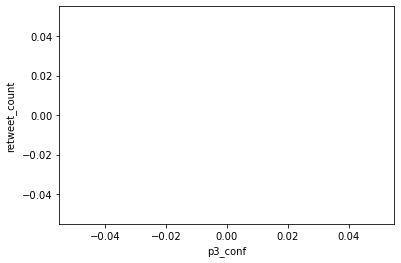

In [83]:
# relation between p1 dog breed and retweet_count & favorite_count
twitter_archive_master_df.plot(x='p3_conf', y='retweet_count', kind='scatter');

# the plot reflect the positive relationship between confidence level of p3 and retweet count. the more confidence level, the more retweet count

<AxesSubplot:>

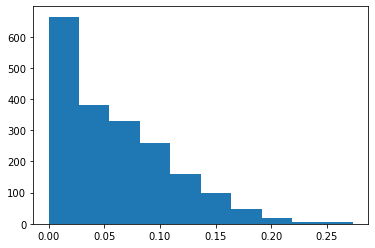

In [87]:
twitter_archive_master_df['p3_conf'].hist(grid=False) 

# the plot shows the distribution of confidence level of p3 

p1
Angora                           NaN
American_Staffordshire_Terrier   NaN
American_Black_Bear              NaN
Alp                              NaN
Airedale                         NaN
Agama                            NaN
African_Hunting_Dog              NaN
African_Grey                     NaN
African_Crocodile                NaN
Afghan_Hound                     NaN
Acorn_Squash                     NaN
Name: retweet_count, dtype: float64

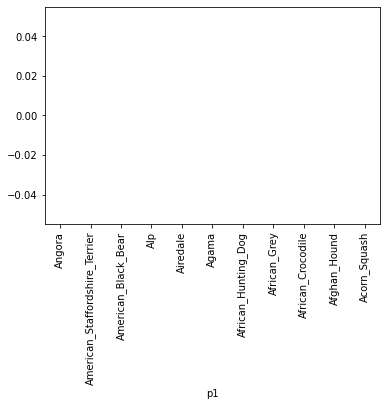

In [88]:
# the 10 top retweet count for p1 breed
twitter_archive_master_df.groupby(['p1']).retweet_count.mean().sort_values(ascending=False)[10::-1].plot(kind='bar')
twitter_archive_master_df.groupby(['p1']).retweet_count.mean().sort_values(ascending=False)[10::-1]

# the plot reflects the top retweer count of p1 breed, the highest breed is `Arabian_Camel`